# Exercício Programa 1 - PMR3201 (2020.1)
*Henrique Barros Oliveira, nUSP 11260512*

O objetivo desse EP é a analise de algumas obras literárias, a fim de determinar
quais são as palavras mais comuns ao longo de seu texto, apresentando esse resultado
em diversos gráficos para visualização.

As bibliotecas utilizadas são as abaixo:

In [29]:
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import wordcloud as wd
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/henrique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Descrição do programa

### Leitura e Pré-Processamento do Texto

Primeiramente, abrimos o texto em questão e realizamos um pré-processamento, deixando apenas
uma lista de palavras (excluindo *stop-words*) minúsculas.

In [30]:
def preProcessa(filepath):
    """
    Essa funcao recebe a localizacao de um arquivo .txt correspondente a um dos textos dados
    e o preprocessa, retornando uma lista das palavras (exceto stop-words) presentes nele
    """

    # Abre o arquivo dado e le seu conteudo
    f = open(filepath, 'r', encoding='utf8')
    raw = f.read()
    f.close()

    # Cria um tokenizer que mantem somente palavras do texto
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(raw)

    # Transforma todos os tokens em letras minusculas
    lwords = []
    for word in tokens:
        lwords.append(word.lower())

    # Carrega os stopwords da lingua inglesa
    sw = nltk.corpus.stopwords.words('english')

    # Retira as stopwords da lista
    words_ns = []
    for word in lwords:
        if word not in sw:
            words_ns.append(word)
    
    return words_ns

### Geração do dicionário de frequências

Utilizando a lista obtida, geramos um dicionário <dicfreq> que contém pares
`(<x>, <n_ocorr>) = (palavra, número de ocorrências)`. Esse dicionário é da forma
```
dicfreq = {a:{}, b:{}, c:{}, .... w:{}, x:{}, y:{}, z:{}}
```

De forma que cada subdicionário contém apenas palavras com a mesma inicial.

In [31]:
def geraFrequencias(words_ns):
    """
    Essa funcao recebe uma lista de palavras sem stopwords, words_ns, e contabiliza as palavras
    de acordo com sua frequencia, retornando um dicionario contendo pares (palavra, numerro_ocorrencias)
    """

    # Inicializa o dicionario de frequencias, separando as palavras de acordo com sua letra inicial
    dicfreq = {'a':{}, 'b':{}, 'c':{}, 'd':{}, 'e':{}, 'f':{}, 'g':{}, 'h':{}, 'i':{}, 'j':{}, 'k':{}, 'l':{}, 'm':{}, 'n':{}, 'o':{}, 'p':{}, 'q':{}, 'r':{}, 's':{}, 't':{}, 'u':{}, 'v':{}, 'w':{}, 'x':{}, 'y':{}, 'z':{}}

    # Percorre toda a lista words_ns, atualizando sua ocorrencia em dicfreq
    for x in words_ns:
        
        # Alguns textos possuem palavras comecando por caracteres invalidos, 
        # como letras com acento (das quais retiramos os acentos), numeros e caracteres
        # '_', os quais também retiramos. 
        if x[0] == '_':
            x = x.replace('_', '')
        if not x:
            continue
        if x[0].isdigit():
            continue
        if x[0] == 'à':
            x = x.replace('à', 'a')
        if x[0] == 'â':
            x = x.replace('â', 'a')
        if x[0] == 'á':
            x = x.replace('á', 'a')
        if x[0] == 'é':
            x = x.replace('é', 'e')
        if x[0] == 'ê':
            x = x.replace('ê', 'a')
        if x[0] == 'ç':
            x = x.replace('ç', 'c')

        # Extrai a inicial da palavra
        inicial = x[0]      

        try:
            if x in dicfreq[inicial]:
                dicfreq[inicial][x] += 1
            else:
                dicfreq[inicial][x] = 1
        except KeyError:
            print("KeyError in word", x)

    return dicfreq

### Geração e ordenação da lista de ocorrências

Agora, é necessário transcrever os pares `(palavra, n_ocorrencias)` do `dicfreq`
para uma lista e ordená-la em ordem decrescente (de forma que os 20 primeiros
índices correspondem às maiores ocorrências.

Para isso, utilizaremos um algoritmo de ordenação por inserção.

In [32]:
def insertionSort(L):
    """
    Funcao de ordenacao por insercao
    """

    for i in range(1, len(L)):
        tmp = L[i]
        j = i
        while j > 0 and tmp[1] > L[j-1][1]: # Note que acessamos o segundo item da tupla, correspondente ao numero de ocorrencias
            L[j] = L[j-1]
            j -= 1
        L[j] = tmp

def ordenaFrequencias(dicfreq):
    """
    Essa funcao recebe um dicionario contendo pares (palavra, numero de ocorrencias), e transforma-o 
    em uma lista ordenada em ordem decrescente, a qual eh retornada
    """

    # Copia as entradas do dicionario para a lista de saida
    lwocorrencias = []
    for inicial in dicfreq:
        while dicfreq[inicial]:
            lwocorrencias.append(dicfreq[inicial].popitem())

    # Ordena a lista utilizando o algoritmo de insertion sort
    insertionSort(lwocorrencias)

    return lwocorrencias

### Geração dos gráficos

Por fim, para analisar o resultado, iremos gerar um gráfico de barras e um gráfico
wordcloud, ambos indicando as 20 maiores palavras de maior ocorrência.

In [33]:
def graficos(lwocorrencias, title):
    """
    Essa funcao recebe uma lista ordenada em ordem decrescente de tuplas (palavra, numero de ocorrencias)
    e gera um grafico de barra com as 20 palavras mais frequentes e um wordcloud
    O parametro 'title' corresponde ao titulo do grafico de barras
    """

    # Gera grafico de barras
    freqword = pd.DataFrame.from_records(lwocorrencias[:20],columns=['word','count'])
    freqword.plot(kind='bar', x='word', title=title)

    # Gera o wordcloud
    wordc = wd.WordCloud(width=900,height=500, max_words=20, relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dict(lwocorrencias))
    plt.figure()
    plt.imshow(wordc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Anáise das obras

Uma vez descritas as funções necessárias, podemos realizar a análise das obras.

### Alice in Wonderland

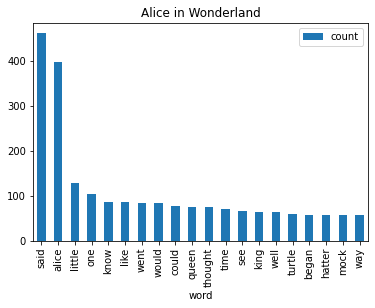

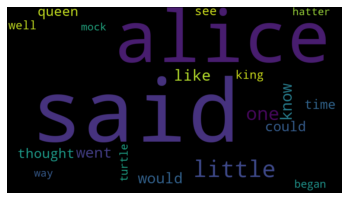

In [34]:
# Alice in Wonderland
words_ns = preProcessa("AliceInWonderland.txt") # O arquivo de texto deve estar no mesmo diretorio do notebook
dicfreq = geraFrequencias(words_ns)
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "Alice in Wonderland")

### Through the Looking Glass

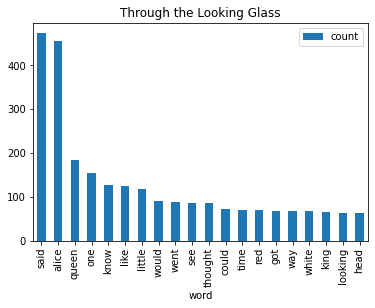

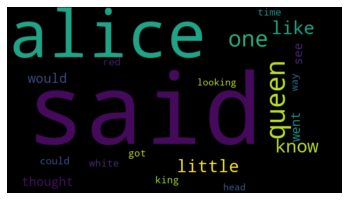

In [35]:
# Through the Looking Glass
words_ns = preProcessa("ThroughTheLookingGlass.txt") # O arquivo de texto deve estar no mesmo diretorio do notebook
dicfreq = geraFrequencias(words_ns)
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "Through the Looking Glass")

### War and Peace

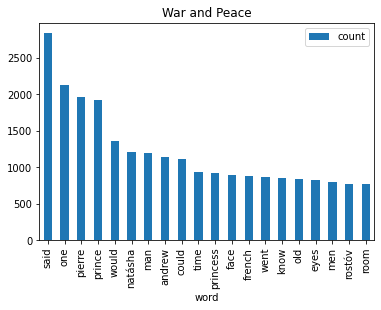

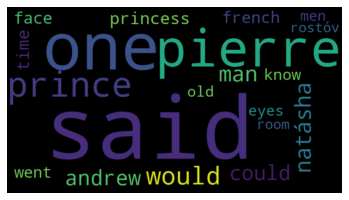

In [36]:
# War and Peace
words_ns = preProcessa("WarAndPeace.txt") # O arquivo de texto deve estar no mesmo diretorio do notebook
dicfreq = geraFrequencias(words_ns)
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "War and Peace")